<a href="https://colab.research.google.com/github/robinsonm2021/Data_science/blob/main/Matt_Robinson_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robinson_Stats Notebook Lab #4


In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
x = np.array([12, 17, 18, 23, 56, 37, 48]) #Array of vectors

In [104]:
# population

In [105]:
def mean(x):  #Mean amount also known as the average
    return np.sum(x)/x.shape[0]

In [106]:
def var(x):
    return mean((x - mean(x))**2) #Each variation from the mean. known as the variant or avg square of the mean

In [107]:
def std(x):
    return np.sqrt(var(x)) #the standard deviation or square root of the variant.

In [108]:
mean(x) #This is for the mean

30.142857142857142

In [109]:
var(x)

247.83673469387756

In [110]:
std(x)

15.742831215949613

### Random Number Generator

In [111]:
m = 75                 # multiplier
b = 74                 # increment
n = 65537              # modulus 

In [112]:
x = 123456      # seed value

In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
X = np.zeros(50000,) #Total value

In [115]:
x = (m * x + b) % n

In [116]:
for i in range(X.shape[0]):

    x = (m * x + b) % n
    
    X[i] = x

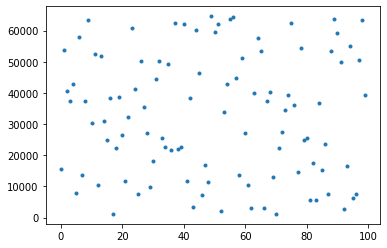

In [117]:
plt.plot(X[:100],'.') #Random plot generator

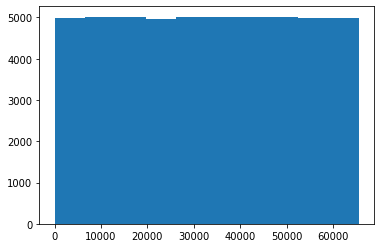

In [118]:
plt.hist(X); #This is a histogram. But it is a uniform number generator

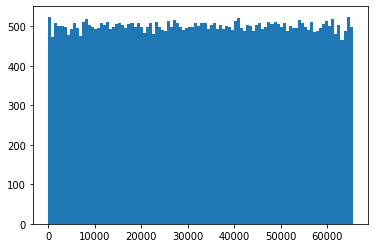

In [119]:
plt.hist(X,100); #Number of values in the histogram.

In [120]:
X #Just some random numbers

array([15572., 53845., 40692., ..., 63854.,  4923., 41614.])

In [121]:
X

array([15572., 53845., 40692., ..., 63854.,  4923., 41614.])

In [122]:
X

array([15572., 53845., 40692., ..., 63854.,  4923., 41614.])

### Random Numbers

In [123]:
X = np.random.random(50000,) #The code below is used to plot random numbers.

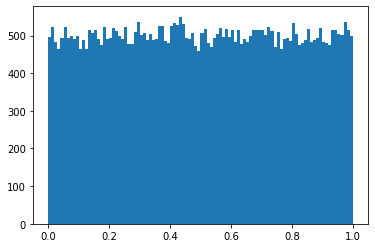

In [124]:
plt.hist(X,100);

In [125]:
np.random.random()

0.9605965213575232

In [126]:
r = np.random.random()

In [127]:
r

0.3580950227002577

In [128]:
r = np.random.randint(1,10)

In [129]:
r

2

In [130]:
r = np.random.randint(1,10,size=(10,2))

In [131]:
r

array([[9, 3],
       [9, 3],
       [4, 9],
       [3, 4],
       [4, 8],
       [5, 4],
       [6, 9],
       [1, 3],
       [9, 4],
       [8, 4]])

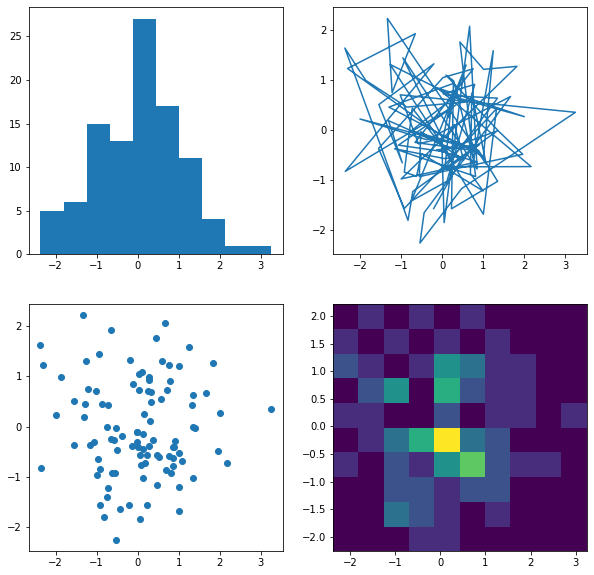

In [132]:
np.random.seed(12345) #these are different types of plots for random numbers
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

Normal Dist Data

In [133]:
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

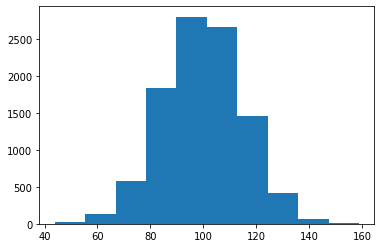

In [134]:
n,bins,patches = plt.hist(x)

In [135]:
bins

array([ 43.81966184,  55.32898772,  66.83831359,  78.34763947,
        89.85696535, 101.36629123, 112.8756171 , 124.38494298,
       135.89426886, 147.40359473, 158.91292061])

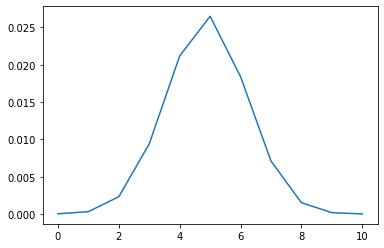

In [136]:
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) #this is the plot for the bins data
plt.plot(y)

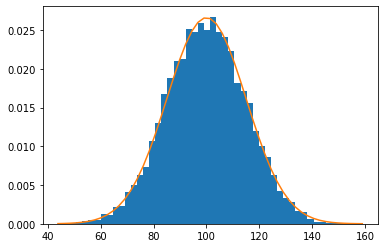

In [137]:
num_bins = 50 #this allows you to see the average of the data
n,bins,patches = plt.hist(x, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins,y)

In [138]:
def mean(x): #Mean
    return np.sum(x)/x.shape[0]

In [139]:
def var(x): #the X variable
    return mean((x - mean(x))**2)

In [140]:
def std(x):
    return np.sqrt(var(x))

In [141]:
mean(x) #The mean value

99.78475345251351

In [142]:
std(x) #standard deviation

14.967403929980673

# Normal Random Number Generator

In [143]:
#CDF PDF

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [144]:
def normal_pdf(x,mu,sigma):
  
  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))

In [145]:
x = np.linspace(-6,6,1000)

In [146]:
mu = 0

In [147]:
sigma = 1

In [148]:
pdf = normal_pdf(x,mu,sigma) #Use Normal for demo, replace with custom function pdf

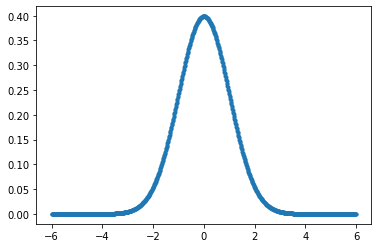

In [149]:
plt.plot(x,pdf,'.')

In [150]:
def partial_sums(x):

  y = np.zeros(x.shape)
  
  for n in range(x.shape[0]):
    
    y[n] = np.sum(x[0:n])
    
  y = y / np.max(y)
    
  return y

In [151]:
cdf = partial_sums(pdf)

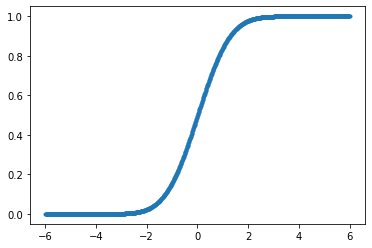

In [44]:
plt.plot(x,cdf,'.');

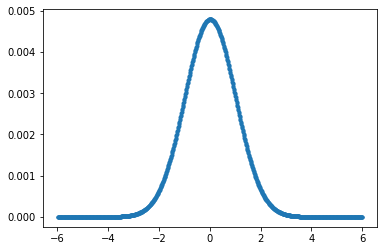

In [45]:
d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the diff of the cdf gives you back the pdf
plt.plot(x[1:],d_cdf,'.');  #Not required for sampling 

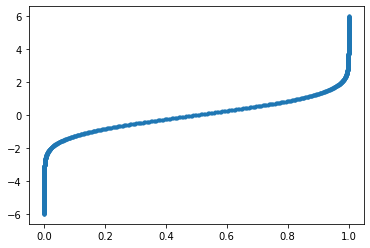

In [46]:
plt.plot(cdf,x,'.');

In [47]:
def find_nearest(array, value):

  idx = np.argmin(np.abs(array - value))
  
  return idx

In [48]:
find_nearest(cdf, 0.1)

393

In [49]:
x[393]

-1.2792792792792795

In [50]:
xr = np.random.random((10000,))

In [51]:
w = np.zeros(xr.shape[0])

for i in range(xr.shape[0]):
  
  w[i] = x[find_nearest(cdf, xr[i])]

In [52]:
w.shape

(10000,)

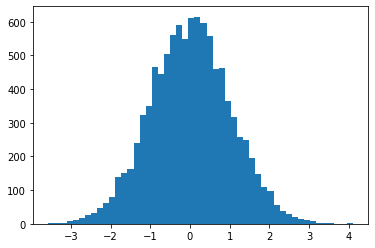

In [53]:
plt.hist(w,50);

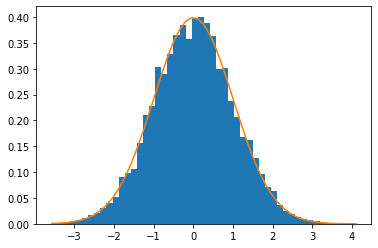

In [54]:
num_bins = 50
n,bins,patches = plt.hist(w, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins,y)

# Random Color

In [56]:
z = np.random.randint(0,255,size=(10,10,3)) #Shape of random colors graph

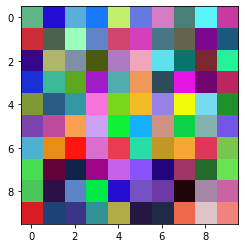

In [57]:
plt.imshow(z) #the plot with colors

In [58]:
z = np.zeros((10,10,3))

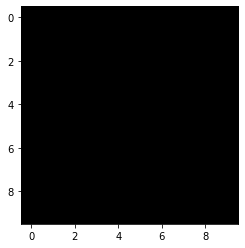

In [59]:
plt.imshow(z)

In [60]:
z = 0*np.ones((10,10,3))

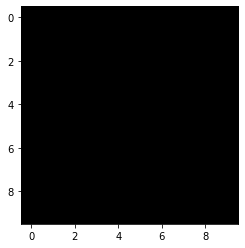

In [61]:
plt.imshow(z)

In [62]:
z = 255*np.ones((10,10,3))

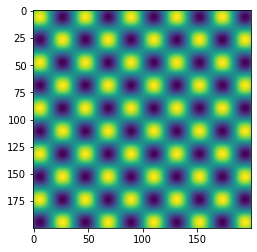

In [152]:
plt.imshow(z)

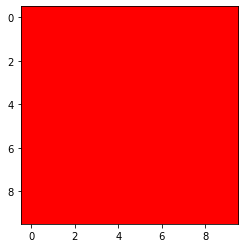

In [153]:
z = np.ones((10,10,3)) #you can choose specific colors by changing the z plot


z[:,:,0] = 1
z[:,:,1] = 0
z[:,:,2] = 0

plt.imshow(z)

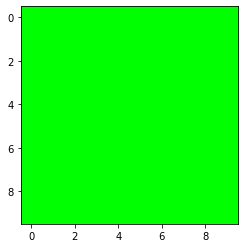

In [65]:
z = np.ones((10,10,3))

z[:,:,0] = 0
z[:,:,1] = 1
z[:,:,2] = 0

plt.imshow(z)

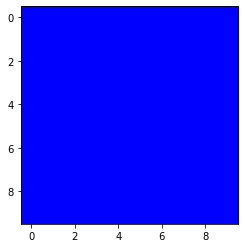

In [66]:
z = np.ones((10,10,3))

z[:,:,0] = 0
z[:,:,1] = 0
z[:,:,2] = 1

plt.imshow(z)

0.5712204714140493 0.9976556005399433 0.9052660506773462


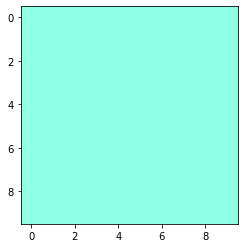

In [154]:
z = np.ones((10,10,3)) #this is a mix of colors

r = np.random.rand()
g = np.random.rand()
b = np.random.rand()

print(r,g,b)

z[:,:,0] = r
z[:,:,1] = g
z[:,:,2] = b

plt.imshow(z);

0.9145823326977014 0.051753602458006975 0.21991277046591062


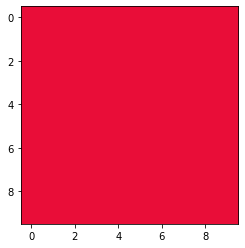

0.47523467740840797 0.8565043902668166 0.5968801094200427


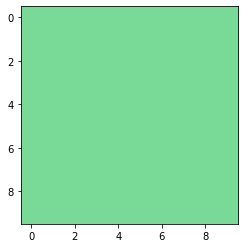

0.7644350932531785 0.914092836214915 0.918729371982313


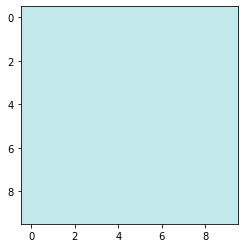

0.8022648636314743 0.7516086963272283 0.3811226478420775


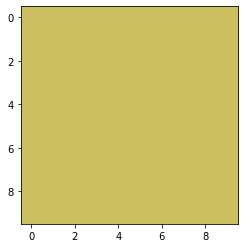

0.16838895490694972 0.23265325151344285 0.2661052416767127


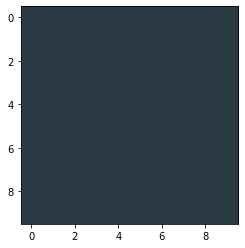

0.4959477058223011 0.742522904078326 0.22701225110687162


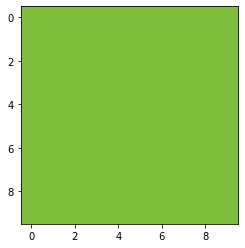

0.2631329162272831 0.562646197672714 0.7207838625504654


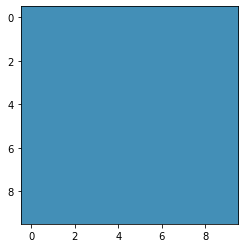

0.33683410300433525 0.568077096130438 0.8208294582962541


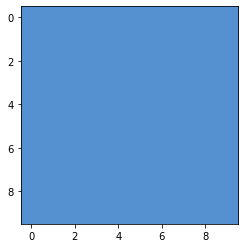

0.6869402509919574 0.7872150187649922 0.7437899413640022


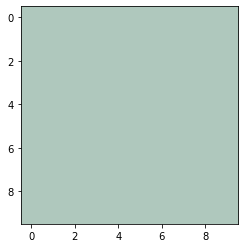

0.8086630025484671 0.27245527250827883 0.9710605680917531


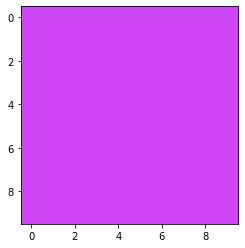

In [155]:
for i in range(10): #this is a range of 10 colors

    z = np.ones((10,10,3))

    r = np.random.rand()
    g = np.random.rand()
    b = np.random.rand()

    print(r,g,b)

    z[:,:,0] = r
    z[:,:,1] = g
    z[:,:,2] = b

    plt.imshow(z);
    plt.show()

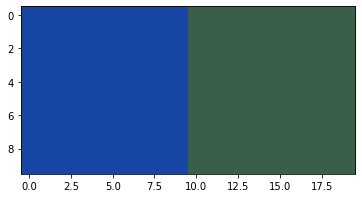

In [156]:
z1 = np.ones((10,10,3)) #random colors side by side
z1[:,:,0] = np.random.rand()
z1[:,:,1] = np.random.rand()
z1[:,:,2] = np.random.rand()

z2 = np.ones((10,10,3))
z2[:,:,0] = np.random.rand()
z2[:,:,1] = np.random.rand()
z2[:,:,2] = np.random.rand()

z3 = np.hstack((z1,z2))

plt.imshow(z3);
plt.show()

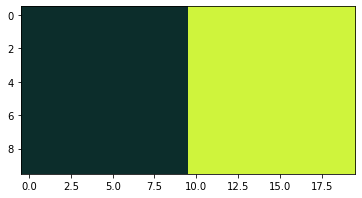

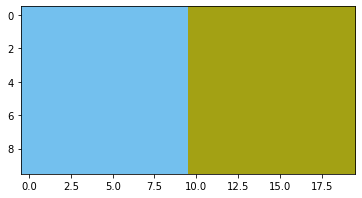

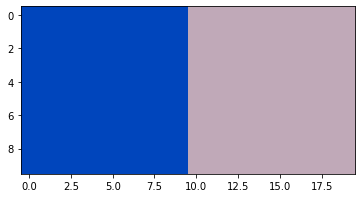

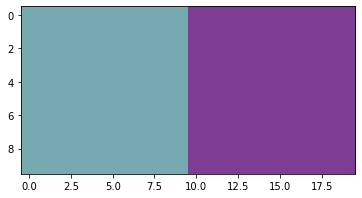

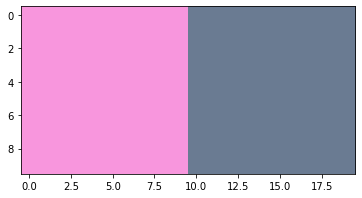

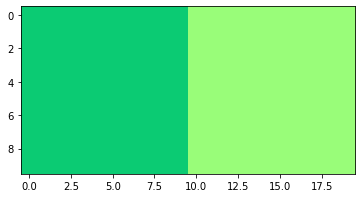

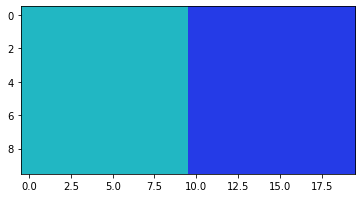

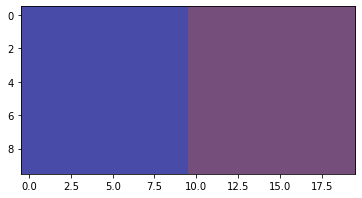

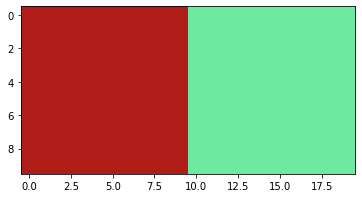

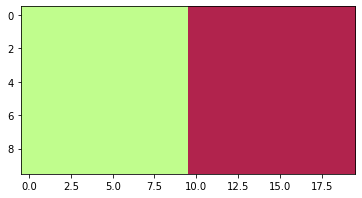

In [70]:
for i in range(10): #20 different colors side by side
    
    z1 = np.ones((10,10,3))
    z1[:,:,0] = np.random.rand()
    z1[:,:,1] = np.random.rand()
    z1[:,:,2] = np.random.rand()

    z2 = np.ones((10,10,3))
    z2[:,:,0] = np.random.rand()
    z2[:,:,1] = np.random.rand()
    z2[:,:,2] = np.random.rand()

    z3 = np.hstack((z1,z2))

    plt.imshow(z3);
    plt.show()

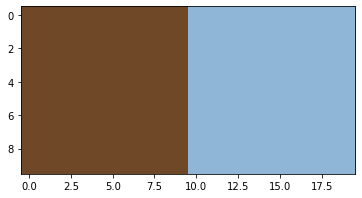

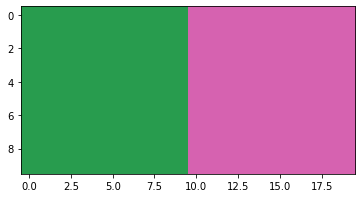

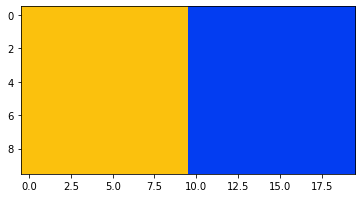

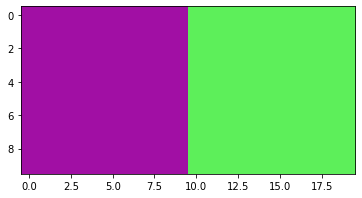

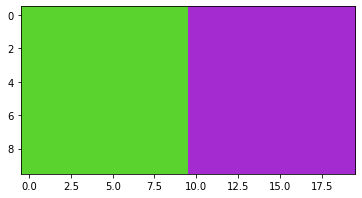

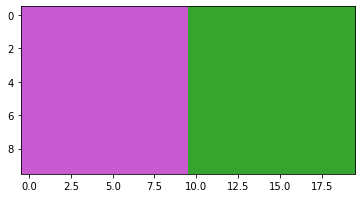

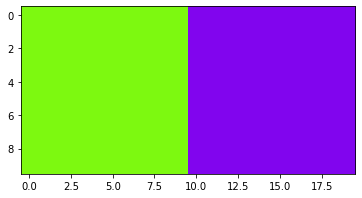

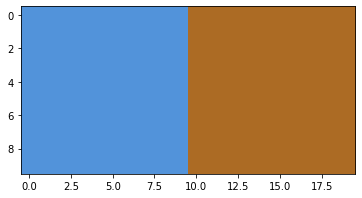

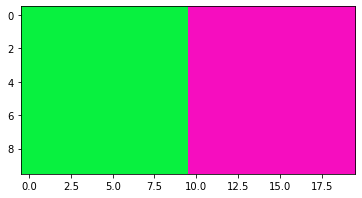

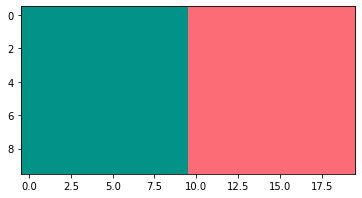

In [71]:
for i in range(10):
    
    z1 = np.ones((10,10,3))
    z2 = np.ones((10,10,3))

    r = np.random.rand()
    g = np.random.rand()
    b = np.random.rand()

    z1[:,:,0] = r
    z1[:,:,1] = g
    z1[:,:,2] = b
    
    z2[:,:,0] = 1-r
    z2[:,:,1] = 1-g
    z2[:,:,2] = 1-b

    z3 = np.hstack((z1,z2))

    plt.imshow(z3);
    plt.show()

https://lospec.com/palette-list

In [157]:
import numpy as np #This is used to plot colors on a graph
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib
import imageio
from PIL import Image

def get_colors_lospec(url):
    im = imageio.imread(url)
    rgb_list = (im/255)[0,:,0:3]
    float_list = list(np.linspace(0,1,len(rgb_list)))    
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [158]:
url = 'https://lospec.com/palette-list/agb-32x.png'

In [159]:
url = 'https://lospec.com/palette-list/agb-1x.png'

In [160]:
url = 'https://lospec.com/palette-list/moondrom-1x.png'

In [76]:
im = imageio.imread(url) #Necessary to plot an image

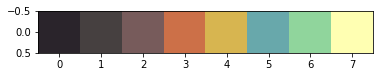

In [77]:
plt.imshow(im); #Plot pallet colors

In [78]:
z = np.random.randint(0,255,size=(10,10))

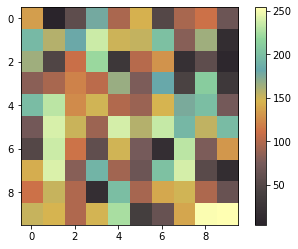

In [79]:
plt.imshow(z, cmap=get_colors_lospec(url))
plt.colorbar();

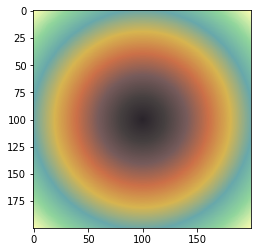

In [80]:
x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
z = np.sqrt(x**2 + y**2)

plt.imshow(z, cmap=get_colors_lospec(url));
plt.show()

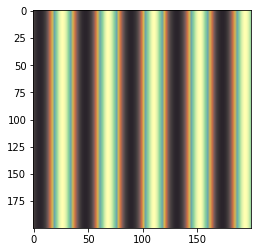

In [81]:
x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
z = np.sin(3*y)

plt.imshow(z, cmap=get_colors_lospec(url));
plt.show()

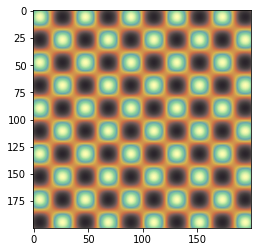

In [82]:
x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
z = np.sin(3*y)*np.sin(3*x)

plt.imshow(z, cmap=get_colors_lospec(url));
plt.show()